In [57]:
def make_map():
        from mpl_toolkits.basemap import Basemap
        m=Basemap(llcrnrlon=-125,llcrnrlat=31,urcrnrlon = -102.5,urcrnrlat=50,projection='cyl',lat_1=33,lat_2=42,lon_0=-110,
                resolution='i',fix_aspect=True)
        # m.drawcoastlines()
        m.drawstates()
        m.drawcountries()
        m.drawmapboundary()
        m.drawparallels(np.arange(-90.,120.,10.),labels=[1,0,0,0]) # draw parallels
        m.drawmeridians(np.arange(0.,420.,10.),labels=[0,0,0,1]) # draw meridians
        m.drawlsmask(land_color='grey',ocean_color='lightblue',lakes=True,resolution='c')
        # m.fillcontinents(color='coral',lake_color='lightblue')
        return(m)

In [58]:
################## INPUTS: BASIN AND MODEL (OR ENSEMBLE AVERAGE OR MEDIAN) ################################################

import matplotlib
%matplotlib inline
import numpy as np
import pylab as plt
import matplotlib.pyplot as plot
from snowpack_functions import unpack_netcdf_file_var
plt.ion()
######################################## SWE GRID CELLS #############################################################
direc = '/raid9/gergel/agg_snowpack/goodleap/SWE/'
file = 'histmeanmask.nc'
lats,lons,boool,datess = unpack_netcdf_file_var(direc,file,"swe")
# g = boool[(np.array(boool)== 1.0)]
boool.shape
lats_inc = list()
lons_inc = list()
for lat in np.arange(len(lats)): 
    for lon in np.arange(len(lons)): 
        if boool[0,lat,lon] == 1.0: 
            lats_inc.append(lats[lat])
            lons_inc.append(lons[lon]) 
lats_inc = np.asarray(lats_inc)
lons_inc = np.asarray(lons_inc)
## mask out Canada
latsinc = lats_inc[lats_inc < 49]
lonsinc = lons_inc[lats_inc < 49]
## create array for pcolormesh
data = np.ones(len(lonsinc))

########################################## NO SWE GRID CELLS ######################################################### 
file = 'histmeanmask_lowlands.nc'
lats_low,lons_low,boool_low,datess = unpack_netcdf_file_var(direc,file,"swe")
lats_inc_low = list()
lons_inc_low = list()
for lat in np.arange(len(lats_low)):
    for lon in np.arange(len(lons_low)):
        if boool_low[0,lat,lon] == 1.0:
            lats_inc_low.append(lats_low[lat])
            lons_inc_low.append(lons_low[lon])
lats_inc_low = np.asarray(lats_inc_low)
lons_inc_low = np.asarray(lons_inc_low)
## mask out Canada
latsinc_low = lats_inc_low[lats_inc_low < 49]
lonsinc_low = lons_inc_low[lats_inc_low < 49]
## create array for pcolormesh
data_low = np.ones(len(lonsinc_low))

from snowpack_functions import mesh_gridify
lonsmeshlow,latsmeshlow,datameshlow = mesh_gridify(latsinc_low.reshape(len(lonsinc_low),1),
                                                   lonsinc_low.reshape(len(lonsinc_low),1),
                                                  data_low.reshape(len(lonsinc_low),1))
# cs = m.pcolormesh(lonsmeshlow,latsmeshlow,datameshlow,shading='flat',cmap='bwr',latlon=True,zorder=1,vmin=1,vmax=1)

saving figure to '/raid9/gergel/agg_snowpack/maps/historical_domain_map_revised'


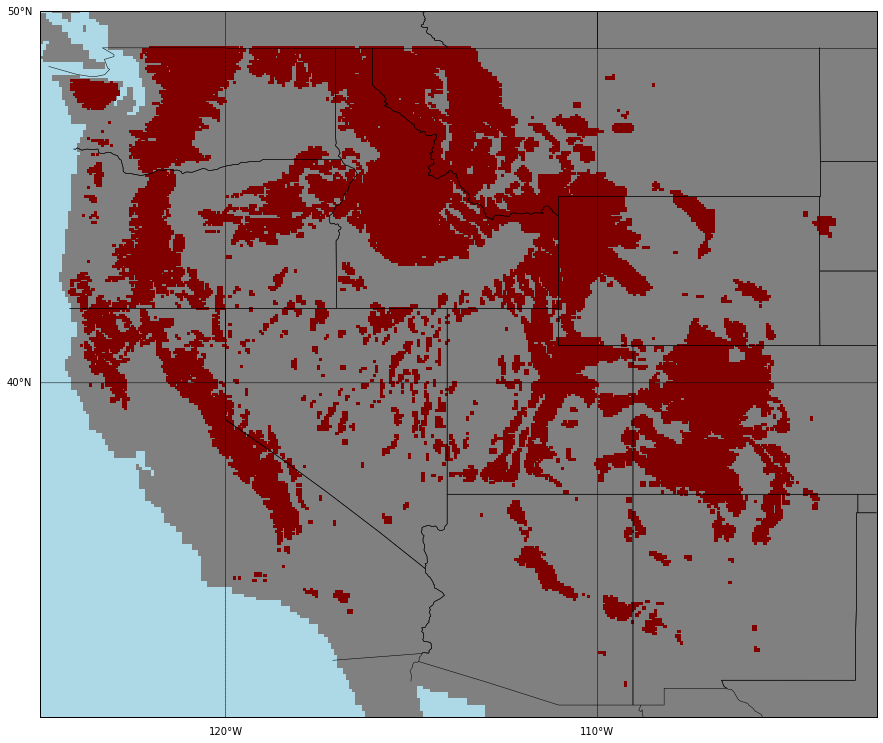

In [59]:
fig = plt.figure(figsize=(15,15))
m = make_map()
    
# x,y = m(lonsinc,latsinc)
from snowpack_functions import mesh_gridify
lons_mesh,lats_mesh,data_mesh = mesh_gridify(latsinc.reshape(len(latsinc),1),lonsinc.reshape(len(latsinc),1),
                                             data.reshape(len(latsinc),1))

#ms = 0.5
#m.scatter(x,y,marker='.',color = 'b',s=ms)
# m.pcolormesh(x,y,color = 'b')
cs = m.pcolormesh(lons_mesh,lats_mesh,data_mesh,shading='flat',cmap='jet_r',latlon=True,zorder=1,vmin=1,vmax=1)

# plt.show()

### save plot
import os
direc = '/raid9/gergel/agg_snowpack/maps/'
model_spec = 'map'
plotname = 'historical_domain_map_revised' 
savepath = os.path.join(direc,plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath)

saving figure to '/raid9/gergel/agg_snowpack/maps/historical_domain_map_revised'


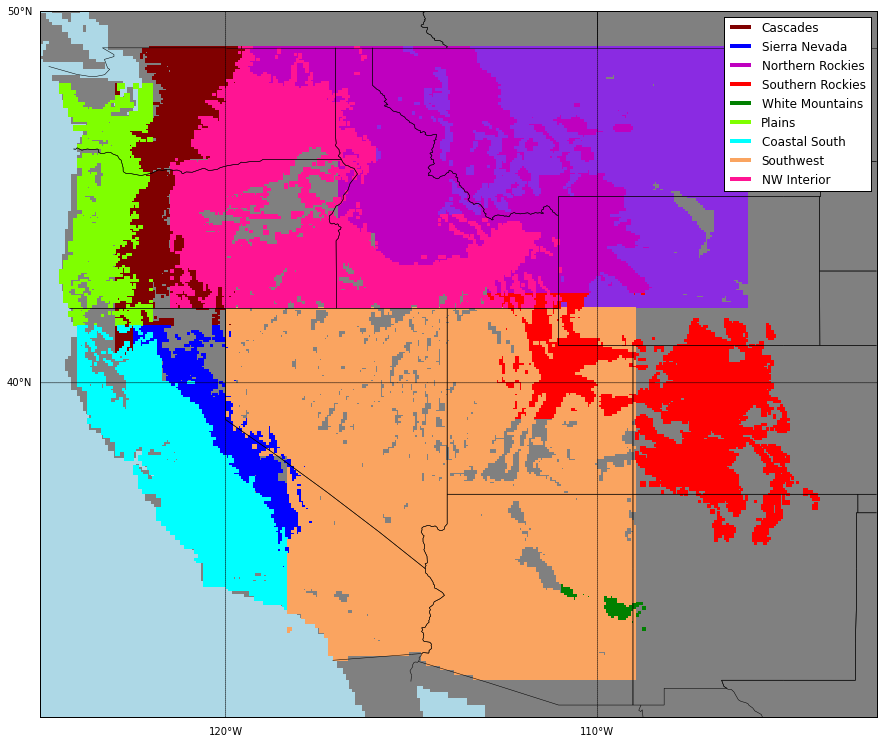

In [85]:
'''
## Cascades
## mask out Olympics 
latsinc = lats_inc[lonsinc > -123]
lonsinc = lons_inc[lonsinc > -123]
## California
## mask out part of CA
mask = (lonsinc > -122) & (latsinc > 40.4)
latsinc = latsinc[mask]
lonsinc = lonsinc[mask]
'''
count = 0
newlatsinc = list()
newlonsinc = list()
for el in np.arange(len(latsinc)): 
    lat = latsinc[el]
    lon = lonsinc[el]
    
    if lon < -122 and lat < 40.7: 
        count += 1
    elif lon < -123:
        count += 1
    elif lon > -119.75 and lon < -114 and lat > 39 and lat < 43.1:
        count += 1
    elif lon > -117.6 and lon < -114 and lat > 30 and lat < 39:
        count += 1
    elif lat > 31.5 and lat < 37 and lon > -114 and lon < -111:
        count += 1
    ## oregon
    elif lat < 46 and lat > 43 and lon > -121 and lon < -117:
        count += 1
    ## utah
    elif lat > 37 and lat < 39 and lon > -114 and lon < -109: 
        count += 1
    elif lat > 39 and lat < 42 and lon > -114 and lat < -112:
        count += 1
    elif lat < 35 and lon < -117:
        count += 1
    elif lat > 43 and lat < 44 and lon > -117 and lon < -116: 
        count += 1
    elif lat > 42 and lat < 49 and lon > -108 and lon < -103:
        count += 1
    elif lat < 33: 
        count += 1
    elif lat < 35.5 and lon > -108.75:
        count += 1
    elif lat > 45 and lon > -109:
        count += 1
    elif lat > 48 and lon > -110:
        count += 1
    elif lat > 35 and lat < 37 and lon < -108 and lon > -111: 
        count += 1
    elif lon > -114 and lon < -113 and lat > 37 and lat < 43: 
        count += 1
    elif lat > 45 and lat < 47 and lon > -118.25 and lon < -117:
        count += 1
    elif lat > 38.5 and lon > -104.5:
        count += 1
    else:
        newlatsinc.append(latsinc[el])
        newlonsinc.append(lonsinc[el]) 

newlatsinc = np.asarray(newlatsinc)
newlonsinc = np.asarray(newlonsinc)


## create array for pcolormesh
data = np.ones(len(newlonsinc))
fig = plt.figure(figsize=(15,15))
m = make_map()
    
# x,y = m(lonsinc,latsinc)
from snowpack_functions import mesh_gridify
# lons_mesh,lats_mesh,data_mesh = mesh_gridify(newlatsinc.reshape(len(newlatsinc),1),newlonsinc.reshape(len(newlatsinc),1),data.reshape(len(newlatsinc),1))

lats_cas = list()
lons_cas = list()
lats_ca = list()
lons_ca = list()
lats_nr = list()
lons_nr = list()
lats_sr = list()
lons_sr = list()
lats_wh = list()
lons_wh = list() 
## make mountain ranges different colors 
for lat,lon in zip(newlatsinc,newlonsinc):
    if lon > -122.5 and lon < -117 and lat < 41.5 and lat > 34.5:
        lats_ca.append(lat)
        lons_ca.append(lon)
    elif lon > -119.5 and lon < -107.5 and lat < 49.0 and lat > 42.37:
        lats_nr.append(lat)
        lons_nr.append(lon)
    elif lon > -113.0 and lon < -104.0 and lat < 42.37 and lat > 35.0:
        lats_sr.append(lat)
        lons_sr.append(lon)
    elif lon > -111 and lon < -108 and lat < 36 and lat > 32:
        lats_wh.append(lat)
        lons_wh.append(lon)
    else: 
        lats_cas.append(lat)
        lons_cas.append(lon)
## convert to arrays
lats_ca = np.asarray(lats_ca)
lons_ca = np.asarray(lons_ca)
lats_cas = np.asarray(lats_cas)
lons_cas = np.asarray(lons_cas)
lats_nr = np.asarray(lats_nr)
lons_nr = np.asarray(lons_nr)
lats_sr = np.asarray(lats_sr)
lons_sr = np.asarray(lons_sr)
lats_wh = np.asarray(lats_wh)
lons_wh = np.asarray(lons_wh)

## make arrays## create array for pcolormesh
data_cas = np.ones(len(np.asarray(lats_cas)))
data_ca = np.ones(len(np.asarray(lats_ca)))*2
data_nr = np.ones(len(np.asarray(lats_nr)))*3
data_sr = np.ones(len(np.asarray(lats_sr)))*4
data_wh = np.ones(len(np.asarray(lats_wh)))*5

## mesh gridify
lons_mesh_ca,lats_mesh_ca,data_mesh_ca = mesh_gridify(lats_ca.reshape(len(lats_ca),1),lons_ca.reshape(len(lons_ca),1),
                                             data_ca.reshape(len(lats_ca),1))
lons_mesh_cas,lats_mesh_cas,data_mesh_cas = mesh_gridify(lats_cas.reshape(len(lats_cas),1),lons_cas.reshape(len(lons_cas),1),
                                             data_cas.reshape(len(lats_cas),1))
lons_mesh_nr,lats_mesh_nr,data_mesh_nr = mesh_gridify(lats_nr.reshape(len(lats_nr),1),lons_nr.reshape(len(lons_nr),1),
                                             data_nr.reshape(len(lats_nr),1))
lons_mesh_sr,lats_mesh_sr,data_mesh_sr = mesh_gridify(lats_sr.reshape(len(lats_sr),1),lons_sr.reshape(len(lons_sr),1),
                                             data_sr.reshape(len(lats_sr),1))
lons_mesh_wh,lats_mesh_wh,data_mesh_wh = mesh_gridify(lats_wh.reshape(len(lats_wh),1),lons_wh.reshape(len(lons_wh),1),
                                             data_wh.reshape(len(lats_wh),1))

# cs = m.pcolormesh(lons_mesh,lats_mesh,data_mesh,shading='flat',cmap='jet_r',latlon=True,zorder=1,vmin=1,vmax=1)
## plot
from matplotlib import colors as c
colours = ['maroon','b','m','r','g','blueviolet','chartreuse','aqua','sandybrown','deeppink']
# cMap = c.ListedColormap(['y','b','m','r','g'])
cs = m.pcolormesh(lons_mesh_cas,lats_mesh_cas,data_mesh_cas,shading='flat',cmap=c.ListedColormap(colours[0]),latlon=True,
                  zorder=1,vmin=1,vmax=10)
cs = m.pcolormesh(lons_mesh_ca,lats_mesh_ca,data_mesh_ca,shading='flat',cmap=c.ListedColormap(colours[1]),latlon=True,
                  zorder=1,vmin=1,vmax=10)
cs = m.pcolormesh(lons_mesh_nr,lats_mesh_nr,data_mesh_nr,shading='flat',cmap=c.ListedColormap(colours[2]),latlon=True,
                  zorder=1,vmin=1,vmax=10)
cs = m.pcolormesh(lons_mesh_sr,lats_mesh_sr,data_mesh_sr,shading='flat',cmap=c.ListedColormap(colours[3]),latlon=True,
                  zorder=1,vmin=1,vmax=10)
cs = m.pcolormesh(lons_mesh_wh,lats_mesh_wh,data_mesh_wh,shading='flat',cmap=c.ListedColormap(colours[4]),latlon=True,
                  zorder=1,vmin=1,vmax=10)

#cs = m.pcolormesh(lonsmeshlow,latsmeshlow,datameshlow,shading='flat',cmap=c.ListedColormap(colours[5]),latlon=True,zorder=1,vmin=1,vmax=1)

########################################################################################################################

lats_pl = list()
lons_pl = list()
lats_cn = list()
lons_cn = list()
lats_cs = list()
lons_cs = list()
lats_sw = list()
lons_sw = list()
lats_nw = list()
lons_nw = list()
lats_co = list()
lons_co = list()

for lat, lon in zip(latsinc_low,lonsinc_low):
    if lon > -121.5 and lon < -111 and lat < 49 and lat > 42:
        lats_nw.append(lat)
        lons_nw.append(lon)
    elif lon > -124.5 and lon < -122.0 and lat < 48 and lat > 41.5:
        lats_cn.append(lat)
        lons_cn.append(lon)
    elif lon > -124 and lon < -120 and lat < 41.5 and lat > 34.5:
        lats_cs.append(lat)
        lons_cs.append(lon)
    elif lon > -120 and lon < -104 and lat < 42 and lat > 31.5:
        lats_sw.append(lat)
        lons_sw.append(lon)
    elif lon > -114 and lon < -106 and lat < 49 and lat > 39:
        lats_pl.append(lat)
        lons_pl.append(lon)

lats_pl = np.asarray(lats_pl)
lons_pl = np.asarray(lons_pl)
lats_cn = np.asarray(lats_cn)
lons_cn = np.asarray(lons_cn)
lats_cs = np.asarray(lats_cs)
lons_cs = np.asarray(lons_cs)
lats_sw = np.asarray(lats_sw)
lons_sw = np.asarray(lons_sw)
lats_nw = np.asarray(lats_nw)
lons_nw = np.asarray(lons_nw)

################## additional masking
count = 0

## for NW Interior

newnwlats = list()
newnwlons = list()
forpl_lats = list()
forpl_lons = list()

for el in np.arange(len(lats_nw)): 
    lat = lats_nw[el]
    lon = lons_nw[el]
    
    if lon > -116 and lat > 44.5: 
        forpl_lats.append(lat)
        forpl_lons.append(lon)
    else: 
        newnwlats.append(lats_nw[el])
        newnwlons.append(lons_nw[el])
        
lats_nw = np.asarray(newnwlats)
lons_nw = np.asarray(newnwlons)

## for Plains 
newpllats = list()
newpllons = list()
for el in np.arange(len(forpl_lats)):
    newpllats.append(forpl_lats[el])
    newpllons.append(forpl_lons[el])
for el in np.arange(len(lats_pl)):
    newpllats.append(lats_pl[el])
    newpllons.append(lons_pl[el])

lats_pl = np.asarray(newpllats)
lons_pl = np.asarray(newpllons)

## for Southwest

newswlats = list()
newswlons = list()
forcs_lats = list()
forcs_lons = list()

for el in np.arange(len(lats_sw)): 
    lat = lats_sw[el]
    lon = lons_sw[el]
    
    if lon > -109 and lat > 37: 
        count += 1
    elif lat < 32:
        count += 1
    elif lon > -120 and lon < -118.4 and lat < 38:
        forcs_lats.append(lat)
        forcs_lons.append(lon)
    elif 
    elif lon > -109:
        count += 1
    else: 
        newswlats.append(lats_sw[el])
        newswlons.append(lons_sw[el])
        
lats_sw = np.asarray(newswlats)
lons_sw = np.asarray(newswlons)

## for Coastal South

newcslats = list()
newcslons = list()

for g in np.arange(len(forcs_lats)):
    if forcs_lats[g] > 37 and forcs_lons[g] > -119.25:
        count += 1
    else:
        newcslats.append(forcs_lats[g])
        newcslons.append(forcs_lons[g])

for el in np.arange(len(lats_cs)): 
    lat = lats_cs[el]
    lon = lons_cs[el]
    
    if lon > -120 and lat > 31: 
        count += 1
    elif lon > -121.75 and lat > 40:
        count += 1
    elif lon > -120.5 and lat > 39: 
        count += 1
    elif lat > 36 and lon > -118:
        count += 1
    else: 
        newcslats.append(lats_cs[el])
        newcslons.append(lons_cs[el])
    
lats_cs = np.asarray(newcslats)
lons_cs = np.asarray(newcslons)


data_pl = np.ones(len(np.asarray(lats_pl)))*6
data_cn = np.ones(len(np.asarray(lats_cn)))*7
data_cs = np.ones(len(np.asarray(lats_cs)))*8
data_sw = np.ones(len(np.asarray(lats_sw)))*9
data_nw = np.ones(len(np.asarray(lats_nw)))*10

lons_mesh_pl,lats_mesh_pl,data_mesh_pl = mesh_gridify(lats_pl.reshape(len(lats_pl),1),lons_pl.reshape(len(lons_pl),1),
                                             data_pl.reshape(len(lats_pl),1))
lons_mesh_cn,lats_mesh_cn,data_mesh_cn = mesh_gridify(lats_cn.reshape(len(lats_cn),1),lons_cn.reshape(len(lons_cn),1),
                                             data_cn.reshape(len(lats_cn),1))
lons_mesh_cs,lats_mesh_cs,data_mesh_cs = mesh_gridify(lats_cs.reshape(len(lats_cs),1),lons_cs.reshape(len(lons_cs),1),
                                             data_cs.reshape(len(lats_cs),1))
lons_mesh_sw,lats_mesh_sw,data_mesh_sw = mesh_gridify(lats_sw.reshape(len(lats_sw),1),lons_sw.reshape(len(lons_sw),1),
                                             data_sw.reshape(len(lats_sw),1))
lons_mesh_nw,lats_mesh_nw,data_mesh_nw = mesh_gridify(lats_nw.reshape(len(lats_nw),1),lons_nw.reshape(len(lons_nw),1),
                                             data_nw.reshape(len(lats_nw),1))

cs = m.pcolormesh(lons_mesh_pl,lats_mesh_pl,data_mesh_pl,shading='flat',cmap=c.ListedColormap(colours[5]),latlon=True,
                  zorder=1,vmin=1,vmax=10)
cs = m.pcolormesh(lons_mesh_cn,lats_mesh_cn,data_mesh_cn,shading='flat',cmap=c.ListedColormap(colours[6]),latlon=True,
                  zorder=1,vmin=1,vmax=10)
cs = m.pcolormesh(lons_mesh_cs,lats_mesh_cs,data_mesh_cs,shading='flat',cmap=c.ListedColormap(colours[7]),latlon=True,
                  zorder=1,vmin=1,vmax=10)
cs = m.pcolormesh(lons_mesh_sw,lats_mesh_sw,data_mesh_sw,shading='flat',cmap=c.ListedColormap(colours[8]),latlon=True,
                  zorder=1,vmin=1,vmax=10,label='Southwest')
cs = m.pcolormesh(lons_mesh_nw,lats_mesh_nw,data_mesh_nw,shading='flat',cmap=c.ListedColormap(colours[9]),latlon=True,
                  zorder=1,vmin=1,vmax=10,label='NW Interior')

import matplotlib.lines as mlines

# colours = ['maroon','b','m','r','g','blueviolet','chartreuse','aqua','sandybrown','deeppink']

l1 = mlines.Line2D([], [], color='maroon', label='Cascades',linewidth=4.0)
l2 = mlines.Line2D([], [], color='b', label='Sierra Nevada',linewidth=4.0)
l3 = mlines.Line2D([], [], color='m', label='Northern Rockies',linewidth=4.0)
l4 = mlines.Line2D([], [], color='r', label='Southern Rockies',linewidth=4.0)
l5 = mlines.Line2D([], [], color='g', label='White Mountains',linewidth=4.0)
l6 = mlines.Line2D([], [], color='chartreuse', label='Plains',linewidth=4.0)
l7 = mlines.Line2D([], [], color='aqua', label='Coastal South',linewidth=4.0)
l8 = mlines.Line2D([], [], color='sandybrown', label='Southwest',linewidth=4.0)
l9 = mlines.Line2D([], [], color='deeppink', label='NW Interior',linewidth=4.0)

plt.legend(handles=[l1,l2,l3,l4,l5,l6,l7,l8,l9])


# plt.show()

### save plot
import os
direc = '/raid9/gergel/agg_snowpack/maps/'
model_spec = 'map'
plotname = 'historical_domain_map_revised' 
savepath = os.path.join(direc,plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath)

In [61]:

'''## updated masks for mask_mtnrange.sh bash script based on above 
if [ "$basin" = "california" ]
then
        echo "now processing $inputfile with $basin mask"
        cdo masklonlatbox,-122.5,-117,41.5,34.5 $tmp $outputfile
elif [ "$basin" = "northernrockies" ]
then
        echo "now processing $inputfile with $basin mask"
        cdo masklonlatbox,-119.5,-107.5,49.0,42.37 $tmp $outputfile
elif [ "$basin" = "southernrockies" ]
then
        echo "now processing $inputfile with $basin mask"
        cdo masklonlatbox,-113.0,-104.0,42.37,35.0 $tmp $outputfile
elif [ "$basin" = "whites" ]
then
        echo "now processing $inputfile with $basin mask"
        cdo masklonlatbox,-111,-108,36,32 $tmp $outputfile
else [ "$basin" = "cascades" ]
        echo "now processing $inputfile with $basin mask"
        cdo masklonlatbox,-123.25,-119.5,49.0,41.5 $tmp $outputfile
fi'''


'## updated masks for mask_mtnrange.sh bash script based on above \nif [ "$basin" = "california" ]\nthen\n        echo "now processing $inputfile with $basin mask"\n        cdo masklonlatbox,-122.5,-117,41.5,34.5 $tmp $outputfile\nelif [ "$basin" = "northernrockies" ]\nthen\n        echo "now processing $inputfile with $basin mask"\n        cdo masklonlatbox,-119.5,-107.5,49.0,42.37 $tmp $outputfile\nelif [ "$basin" = "southernrockies" ]\nthen\n        echo "now processing $inputfile with $basin mask"\n        cdo masklonlatbox,-113.0,-104.0,42.37,35.0 $tmp $outputfile\nelif [ "$basin" = "whites" ]\nthen\n        echo "now processing $inputfile with $basin mask"\n        cdo masklonlatbox,-111,-108,36,32 $tmp $outputfile\nelse [ "$basin" = "cascades" ]\n        echo "now processing $inputfile with $basin mask"\n        cdo masklonlatbox,-123.25,-119.5,49.0,41.5 $tmp $outputfile\nfi'